In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import RFECV

In [4]:
tourney_result = pd.read_csv('../input/kaggle_data/MNCAATourneyCompactResults.csv')

tourney_result = tourney_result.drop(['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'],axis=1)

In [5]:
adj_eff = pd.read_csv('../input/self_calculated/adjusted_efficiencies.csv')
consistency = pd.read_csv('../input/self_calculated/consistency.csv')
shoot_const = pd.read_csv('../input/self_calculated/shooting_consistency.csv')

In [6]:
all_teams = adj_eff.merge(shoot_const,on=['Season','TeamID'])
all_teams = all_teams.merge(consistency,on=['Season','TeamID'])

all_teams = all_teams.drop(['RawNetEff'],axis=1)

all_teams.rename(columns={'tm_off_eff_std':'off_cons','tm_def_eff_std':'def_cons'},inplace=True)

all_teams

,Season,TeamID,AdjNetEff,tm_ts_std,opp_ts_std,tm_efg_std,opp_efg_std,Pos_std,off_cons,def_cons
0,2003,1102,2.549120,0.136020,0.114104,0.145739,0.110239,4.544885,23.752202,21.316022
1,2003,1103,-0.892082,0.071782,0.070552,0.079779,0.090102,8.768290,14.223345,12.598310
2,2003,1104,16.005042,0.068348,0.075739,0.085439,0.079747,4.578047,14.554749,15.141803
3,2003,1105,-17.739565,0.076527,0.081597,0.078726,0.091814,5.924156,16.307845,19.190037
4,2003,1106,-9.118578,0.084058,0.091331,0.082209,0.100697,4.980870,14.784855,18.732358
5,2003,1107,-18.899802,0.071921,0.061274,0.076031,0.068429,5.930437,13.248183,16.426759
6,2003,1108,-11.597642,0.072017,0.071650,0.074155,0.077604,5.327232,12.204852,13.567259
7,2003,1110,2.761780,0.073485,0.071538,0.075176,0.079159,4.529160,14.825526,13.739147
8,2003,1111,-0.574032,0.090509,0.096348,0.099672,0.095969,8.645432,14.179801,17.582319
9,2003,1112,27.877550,0.065754,0.053110,0.065593,0.055759,5.680541,13.211491,13.021743


In [7]:
df1 = tourney_result
df2 = all_teams

df = df1.merge(df2,left_on=['Season','WTeamID'],right_on=['Season','TeamID'], how="inner")

df = df.drop(['TeamID'],axis=1)

df = df.merge(df2,left_on=['Season','LTeamID'],right_on=['Season','TeamID'],how='inner')
df = df.drop(['TeamID'],axis=1)

print(df.columns)

Index(['Season', 'WTeamID', 'LTeamID', 'AdjNetEff_x', 'tm_ts_std_x',
       'opp_ts_std_x', 'tm_efg_std_x', 'opp_efg_std_x', 'Pos_std_x',
       'off_cons_x', 'def_cons_x', 'AdjNetEff_y', 'tm_ts_std_y',
       'opp_ts_std_y', 'tm_efg_std_y', 'opp_efg_std_y', 'Pos_std_y',
       'off_cons_y', 'def_cons_y'],
      dtype='object')


In [8]:
df_win = df.copy()
df_lose = df_win.copy()

df_lose['tm_ts_std_x'] = df_win['tm_ts_std_y']
df_lose['tm_ts_std_y'] = df_win['tm_ts_std_x']

df_lose['tm_efg_std_x'] = df_win['tm_efg_std_y']
df_lose['tm_efg_std_y'] = df_win['tm_efg_std_x']

df_lose['opp_ts_std_x'] = df_win['opp_ts_std_y']
df_lose['opp_ts_std_y'] = df_win['opp_ts_std_x']

df_lose['opp_efg_std_x'] = df_win['opp_efg_std_y']
df_lose['opp_efg_std_y'] = df_win['opp_efg_std_x']

df_lose['AdjNetEff_x'] = df_win['AdjNetEff_y']
df_lose['AdjNetEff_y'] = df_win['AdjNetEff_x']

df_lose['off_cons_x'] = df_win['off_cons_y']
df_lose['off_cons_y'] = df_win['off_cons_x']

df_lose['def_cons_x'] = df_win['def_cons_y']
df_lose['def_cons_y'] = df_win['def_cons_x']

df_lose['Pos_std_x'] = df_win['Pos_std_y']
df_lose['Pos_std_y'] = df_win['Pos_std_x']

In [24]:
df_win['result'] = 1
df_lose['result'] = 0

df_final = pd.concat((df_win,df_lose)).reset_index(drop=True)

df_final['AdjNetEff_Diff'] = df_final['AdjNetEff_x'] - df_final['AdjNetEff_y']

df_final = df_final[df_final['Season']<2015]

df_final = df_final.drop(['Season','WTeamID','LTeamID','AdjNetEff_x','AdjNetEff_y'],axis=1)

df_final = df_final[['AdjNetEff_Diff','tm_ts_std_x',
       'opp_ts_std_x', 'tm_efg_std_x', 'opp_efg_std_x', 'Pos_std_x',
       'off_cons_x', 'def_cons_x', 'tm_ts_std_y',
       'opp_ts_std_y', 'tm_efg_std_y', 'opp_efg_std_y', 'Pos_std_y',
       'off_cons_y', 'def_cons_y','result']]

In [25]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method, method2):
    auc_score = roc_auc_score(y_actual, method)
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2)
    return (auc_score, fpr_df, tpr_df)

In [26]:
X = df_final.drop('result',axis=1)
y = df_final.result
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [27]:
param_grid = {'C':np.logspace(start=-5,stop=3,num=9),
            'solver':['lbfgs','liblinear','sag','saga'],
            'max_iter':[50,100]
}
LogReg_Grid = GridSearchCV(LogisticRegression(),param_grid, cv=10, refit=True, verbose=0, scoring='neg_log_loss')
LogReg_Grid.fit(X_train, y_train)
best_model(LogReg_Grid)

-0.5343115674375205
{'C': 100.0, 'max_iter': 50, 'solver': 'liblinear'}
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [28]:
param_grid ={'alpha':np.logspace(start=-5,stop=3,num=9),
             'max_iter':[100,500,1000],
             'loss':['log','modified_huber']
}
SGD_Grid = GridSearchCV(SGDClassifier(),param_grid, cv=10,refit=True, verbose=0, scoring='neg_log_loss')
SGD_Grid.fit(X_train,y_train)
best_model(SGD_Grid)

-0.5384203097173452
{'alpha': 1.0, 'loss': 'log', 'max_iter': 500}
SGDClassifier(alpha=1.0, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=500,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [29]:
LR_model = LogReg_Grid.best_estimator_
SGD_model = SGD_Grid.best_estimator_

auc_LR, fpr_LR, tpr_LR = get_auc_scores(y_test, LR_model.predict(X_test),LR_model.predict_proba(X_test)[:,1])
auc_SGD, fpr_SGD, tpr_SGD = get_auc_scores(y_test, SGD_model.predict(X_test),SGD_model.predict_proba(X_test)[:,1])

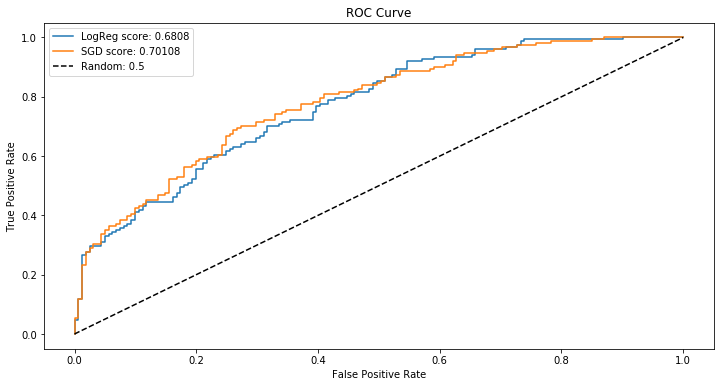

In [30]:
fig = plt.figure(figsize=(12,6), linewidth=1)
plt.plot(fpr_LR, tpr_LR, label='LogReg score: ' + str(round(auc_LR,5)))
plt.plot(fpr_SGD, tpr_SGD, label='SGD score: ' + str(round(auc_SGD,5)))
plt.plot([0,1],[0,1],'k--', label='Random: 0.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

Otpimal number of features: 14


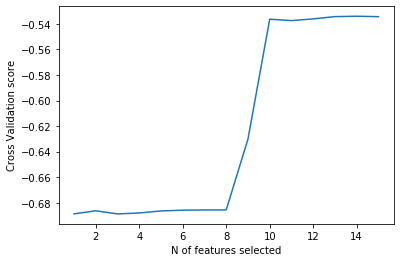

In [31]:
min_features_to_select = 1 
lr_clf = LR_model
rfecv = RFECV(estimator=lr_clf, step=1, cv=10, scoring='neg_log_loss', min_features_to_select=min_features_to_select)
rfecv.fit(X_train,y_train)

print('Otpimal number of features: %d' % rfecv.n_features_)


plt.figure()
plt.xlabel('N of features selected')
plt.ylabel('Cross Validation score')
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [32]:
for i in range(X_train.shape[1]):
    print('Column %s, Selected %s, Rank %.3f' % (X_train.columns[i], rfecv.support_[i], rfecv.ranking_[i]))

Column AdjNetEff_Diff, Selected True, Rank 1.000
Column tm_ts_std_x, Selected True, Rank 1.000
Column opp_ts_std_x, Selected True, Rank 1.000
Column tm_efg_std_x, Selected True, Rank 1.000
Column opp_efg_std_x, Selected True, Rank 1.000
Column Pos_std_x, Selected True, Rank 1.000
Column off_cons_x, Selected True, Rank 1.000
Column def_cons_x, Selected True, Rank 1.000
Column tm_ts_std_y, Selected True, Rank 1.000
Column opp_ts_std_y, Selected True, Rank 1.000
Column tm_efg_std_y, Selected True, Rank 1.000
Column opp_efg_std_y, Selected True, Rank 1.000
Column Pos_std_y, Selected True, Rank 1.000
Column off_cons_y, Selected False, Rank 2.000
Column def_cons_y, Selected True, Rank 1.000


In [33]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X,y)

array([0.16164217, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])